In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df2 = pd.read_json('C:/Users/pro_v/Downloads/controversial-comments.jsonl', lines=True)

In [4]:
df2.head(10)

,con,txt
0,0,Well it's great that he did something about th...
1,0,You are right Mr. President.
2,0,You have given no input apart from saying I am...
3,0,I get the frustration but the reason they want...
4,0,I am far from an expert on TPP and I would ten...
5,0,Thanks for playing. [I feel like her now](http...
6,0,[deleted]
7,0,"i cant be racist, i have a black friend \n\nl..."
8,0,Nope. You're right that they are both smoke an...
9,0,&lt;That's exactly what it means. especially w...


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   con     950000 non-null  int64 
 1   txt     950000 non-null  object
dtypes: int64(1), object(1)
memory usage: 14.5+ MB


In [6]:
df2.columns

Index(['con', 'txt'], dtype='object')

In [7]:
df2['Lower']=df2['txt'].apply(lambda x: x.lower())

In [8]:
df2['No_punct'] = df2['Lower'].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [9]:
df2.head(10)

,con,txt,Lower,No_punct
0,0,Well it's great that he did something about th...,well it's great that he did something about th...,well its great that he did something about tho...
1,0,You are right Mr. President.,you are right mr. president.,you are right mr president
2,0,You have given no input apart from saying I am...,you have given no input apart from saying i am...,you have given no input apart from saying i am...
3,0,I get the frustration but the reason they want...,i get the frustration but the reason they want...,i get the frustration but the reason they want...
4,0,I am far from an expert on TPP and I would ten...,i am far from an expert on tpp and i would ten...,i am far from an expert on tpp and i would ten...
5,0,Thanks for playing. [I feel like her now](http...,thanks for playing. [i feel like her now](http...,thanks for playing i feel like her nowhttpsthe...
6,0,[deleted],[deleted],deleted
7,0,"i cant be racist, i have a black friend \n\nl...","i cant be racist, i have a black friend \n\nl...",i cant be racist i have a black friend \n\nlo...
8,0,Nope. You're right that they are both smoke an...,nope. you're right that they are both smoke an...,nope youre right that they are both smoke and ...
9,0,&lt;That's exactly what it means. especially w...,&lt;that's exactly what it means. especially w...,ltthats exactly what it means especially when ...


In [10]:
df2['Length']=df2['No_punct'].str.len()

In [11]:
df2.head(10)

,con,txt,Lower,No_punct,Length
0,0,Well it's great that he did something about th...,well it's great that he did something about th...,well its great that he did something about tho...,187
1,0,You are right Mr. President.,you are right mr. president.,you are right mr president,26
2,0,You have given no input apart from saying I am...,you have given no input apart from saying i am...,you have given no input apart from saying i am...,81
3,0,I get the frustration but the reason they want...,i get the frustration but the reason they want...,i get the frustration but the reason they want...,523
4,0,I am far from an expert on TPP and I would ten...,i am far from an expert on tpp and i would ten...,i am far from an expert on tpp and i would ten...,1537
5,0,Thanks for playing. [I feel like her now](http...,thanks for playing. [i feel like her now](http...,thanks for playing i feel like her nowhttpsthe...,138
6,0,[deleted],[deleted],deleted,7
7,0,"i cant be racist, i have a black friend \n\nl...","i cant be racist, i have a black friend \n\nl...",i cant be racist i have a black friend \n\nlo...,123
8,0,Nope. You're right that they are both smoke an...,nope. you're right that they are both smoke an...,nope youre right that they are both smoke and ...,196
9,0,&lt;That's exactly what it means. especially w...,&lt;that's exactly what it means. especially w...,ltthats exactly what it means especially when ...,535


In [12]:
from wordcloud import WordCloud

In [13]:
variable = WordCloud().generate(df2.txt[5])

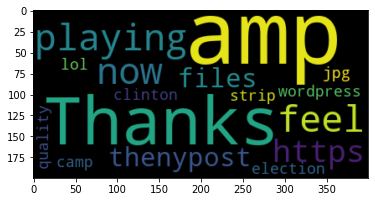

In [15]:
plt.imshow(variable, interpolation = 'bilinear')
plt.axis
plt.show()

In [11]:
df2 = df2.sample(n=2000, axis=None)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 844634 to 199945
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   con       2000 non-null   int64 
 1   txt       2000 non-null   object
 2   Lower     2000 non-null   object
 3   No_punct  2000 non-null   object
 4   Length    2000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 93.8+ KB


In [12]:
from textblob import TextBlob

In [13]:
df2['Textblob sentiment score'] = df2['txt'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2.head(10)

,con,txt,Lower,No_punct,Length,Textblob sentiment score
844634,0,What about the superdelegates? Those are even ...,what about the superdelegates? those are even ...,what about the superdelegates those are even l...,438,0.188542
744694,0,"You literally, LITERALLY, have no evidence tho...","you literally, literally, have no evidence tho...",you literally literally have no evidence those...,1047,0.005859
890348,0,You could have been the next Tiger Woods or De...,you could have been the next tiger woods or de...,you could have been the next tiger woods or de...,76,0.000000
278629,0,[removed],[removed],removed,7,0.000000
578142,1,"I think this is stupid reasoning, but if it ba...","i think this is stupid reasoning, but if it ba...",i think this is stupid reasoning but if it bai...,114,-1.000000
840011,0,You're my hero. Objectivity is rare these days.,you're my hero. objectivity is rare these days.,youre my hero objectivity is rare these days,44,0.300000
742129,0,[removed],[removed],removed,7,0.000000
216497,0,Haha few hundred million...what a scrub.,haha few hundred million...what a scrub.,haha few hundred millionwhat a scrub,36,0.000000
170434,0,if you are willing to believe politico (grain ...,if you are willing to believe politico (grain ...,if you are willing to believe politico grain o...,1029,0.037500
770238,0,"It's interesting to me that, given a set of da...","it's interesting to me that, given a set of da...",its interesting to me that given a set of data...,776,0.064957


In [14]:
df2['Textblob sentiment score for No_punct'] = df2['No_punct'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2.head(10)

,con,txt,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for No_punct
844634,0,What about the superdelegates? Those are even ...,what about the superdelegates? those are even ...,what about the superdelegates those are even l...,438,0.188542,0.188542
744694,0,"You literally, LITERALLY, have no evidence tho...","you literally, literally, have no evidence tho...",you literally literally have no evidence those...,1047,0.005859,0.000794
890348,0,You could have been the next Tiger Woods or De...,you could have been the next tiger woods or de...,you could have been the next tiger woods or de...,76,0.000000,0.000000
278629,0,[removed],[removed],removed,7,0.000000,0.000000
578142,1,"I think this is stupid reasoning, but if it ba...","i think this is stupid reasoning, but if it ba...",i think this is stupid reasoning but if it bai...,114,-1.000000,-0.800000
840011,0,You're my hero. Objectivity is rare these days.,you're my hero. objectivity is rare these days.,youre my hero objectivity is rare these days,44,0.300000,0.300000
742129,0,[removed],[removed],removed,7,0.000000,0.000000
216497,0,Haha few hundred million...what a scrub.,haha few hundred million...what a scrub.,haha few hundred millionwhat a scrub,36,0.000000,0.000000
170434,0,if you are willing to believe politico (grain ...,if you are willing to believe politico (grain ...,if you are willing to believe politico grain o...,1029,0.037500,0.037500
770238,0,"It's interesting to me that, given a set of da...","it's interesting to me that, given a set of da...",its interesting to me that given a set of data...,776,0.064957,0.064957


In [16]:
df2['Categorize lowercase comment'] = df2["Textblob sentiment score"].apply(lambda x: 'Positive' if x >=0 else 'Negative')
df2['Categorize No Punctuations comment'] = df2["Textblob sentiment score for No_punct"].apply(lambda x: 'Positive' if x >=0 else 'Negative')
df2.head(10)

,con,txt,Lower,No_punct,Length,Textblob sentiment score,Textblob sentiment score for No_punct,Categorize lowercase comment,Categorize No Punctuations comment
844634,0,What about the superdelegates? Those are even ...,what about the superdelegates? those are even ...,what about the superdelegates those are even l...,438,0.188542,0.188542,Positive,Positive
744694,0,"You literally, LITERALLY, have no evidence tho...","you literally, literally, have no evidence tho...",you literally literally have no evidence those...,1047,0.005859,0.000794,Positive,Positive
890348,0,You could have been the next Tiger Woods or De...,you could have been the next tiger woods or de...,you could have been the next tiger woods or de...,76,0.000000,0.000000,Positive,Positive
278629,0,[removed],[removed],removed,7,0.000000,0.000000,Positive,Positive
578142,1,"I think this is stupid reasoning, but if it ba...","i think this is stupid reasoning, but if it ba...",i think this is stupid reasoning but if it bai...,114,-1.000000,-0.800000,Negative,Negative
840011,0,You're my hero. Objectivity is rare these days.,you're my hero. objectivity is rare these days.,youre my hero objectivity is rare these days,44,0.300000,0.300000,Positive,Positive
742129,0,[removed],[removed],removed,7,0.000000,0.000000,Positive,Positive
216497,0,Haha few hundred million...what a scrub.,haha few hundred million...what a scrub.,haha few hundred millionwhat a scrub,36,0.000000,0.000000,Positive,Positive
170434,0,if you are willing to believe politico (grain ...,if you are willing to believe politico (grain ...,if you are willing to believe politico grain o...,1029,0.037500,0.037500,Positive,Positive
770238,0,"It's interesting to me that, given a set of da...","it's interesting to me that, given a set of da...",its interesting to me that given a set of data...,776,0.064957,0.064957,Positive,Positive


In [18]:
df2['Categorize lowercase comment'].value_counts()

Positive    1552
Negative     448
Name: Categorize lowercase comment, dtype: int64

In [19]:
df2['Categorize No Punctuations comment'].value_counts()

Positive    1552
Negative     448
Name: Categorize No Punctuations comment, dtype: int64

In [21]:
df2['Categorize No Punctuations comment'].value_counts()/len(df2)*100

Positive    77.6
Negative    22.4
Name: Categorize No Punctuations comment, dtype: float64

In [14]:
import matplotlib.pyplot as plt

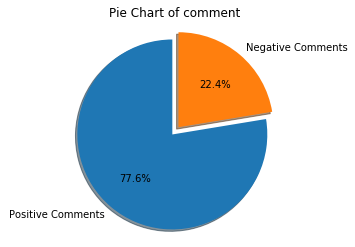

In [24]:
sizes_2 = [77.6, 22.4]
labels_2 = 'Positive Comments', 'Negative Comments'
explode_2 = (0.1, 0)
fig3, ax3 = plt.subplots()
ax3.pie(sizes_2, explode_2,labels=labels_2, autopct='%1.1f%%',shadow = True, startangle = 90)
ax3.axis('equal')
ax3.set_title('Pie Chart of comment')
plt.show()

In [1]:
from wordcloud import WorldCloud from wordcloud import WordCloud

ImportError: cannot import name 'WorldCloud' from 'wordcloud' (C:\Users\pro_v\anaconda3\lib\site-packages\wordcloud\__init__.py)